In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import poisson

/Users/madeleinesheehan/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Reading data

In [2]:
biyashee_colony_cnts = pd.read_csv('data/Bishayee Colony Counts 10.27.97-3.8.01.csv', skiprows=2)
biyashee_coulter_cnts = pd.read_csv('data/Bishayee Coulter Counts.10.20.97-7.16.01.csv', skiprows=1)
other_colony_cnts = pd.read_csv('data/Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.csv', skiprows=1)
other_coulter_cnts = pd.read_csv('data/Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.csv', skiprows=1)
outside_coulter_cnts1 = pd.read_csv('data/Outside Lab 1.Coulter Counts.6.7.91-4.9.99.csv')
outside_coulter_cnts2 = pd.read_csv('data/Outside Lab 2.Coulter Counts.6.6.08-7.7.08.csv', skiprows=1)
outside_colony_cnts =  pd.read_csv('data/Outside Lab 3.Colony Counts.2.4.10-5.21.12.csv', skiprows=1)

#### Filling missing headers, dates, experiment numbers

In [3]:
# adding column names for outside_coulter_cnts1 table
outside_coulter_cnts1.columns = ['Experiment', 'Coul 1', 'Coul 2', 'Coul 3', 'Average','Date']
# filling in experiment and date info
for i in range(len(outside_coulter_cnts1)):
    if outside_coulter_cnts1['Experiment'].isnull()[i]:
        outside_coulter_cnts1.loc[i,'Experiment'] = outside_coulter_cnts1['Experiment'][i-1]
    if outside_coulter_cnts1['Date'].isnull()[i]:
        outside_coulter_cnts1.loc[i,'Date'] = outside_coulter_cnts1['Date'][i-1]

#filling in date info for outside_coulter_cnts2
for i in range(len(outside_coulter_cnts2)):
    if outside_coulter_cnts2['Date'].isnull()[i]:
        outside_coulter_cnts2.loc[i,'Date'] = outside_coulter_cnts2['Date'][i-1]
        
#filling in date info for outside_colony counts
for i in range(len(outside_colony_cnts)):
    if outside_colony_cnts['date'].isnull()[i]:
        outside_colony_cnts.loc[i,'date'] = outside_colony_cnts['date'][i-1]


#### First few entries in `outside_colony_cnts` as example

In [4]:
outside_colony_cnts.head()

,date,c1,c2,c3,average
0,2/4/10,54,55,59,56.00
1,2/4/10,47,60,47,51.33
2,2/5/10,55,60,53,56.00
3,2/5/10,58,54,59,57.00
4,2/5/10,17,17,15,16.33


### Terminal digits analysis
#### Testing the assumptions: Is the terminal digit of a Poisson variable uniform?

<IPython.core.display.Javascript object>


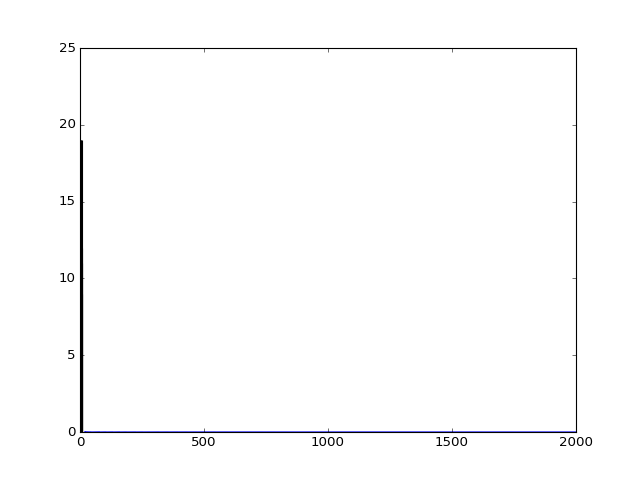

In [5]:
# Computes the total variation distance of the terminal digit distribution against uniform
def termd_poisson_tv(mu):
    # Computes the probability mass, tail probability disregarded
    num_comp = np.ceil(poisson.ppf(0.99, mu) / 10) * 10
    prob = poisson.pmf(np.arange(num_comp), mu)
    # Normalization by 1-norm
    prob = prob / np.linalg.norm(prob, 1)
    # Reshaping prob into 10 columns so each row can be added
    prob = np.reshape(prob, (-1, 10))
    return np.linalg.norm(prob.sum(axis = 0) - np.ones(10) / 10, 1)

v_termd_poisson_tv = np.vectorize(termd_poisson_tv)
# Range of mu we are plotting
x = np.arange(20, 2000)
plt.plot(x, v_termd_poisson_tv(x))

The total variation distance decreases and thus this assumption that the terminal digit distributes uniformly seems reasonable.

#### Replication

150


<IPython.core.display.Javascript object>


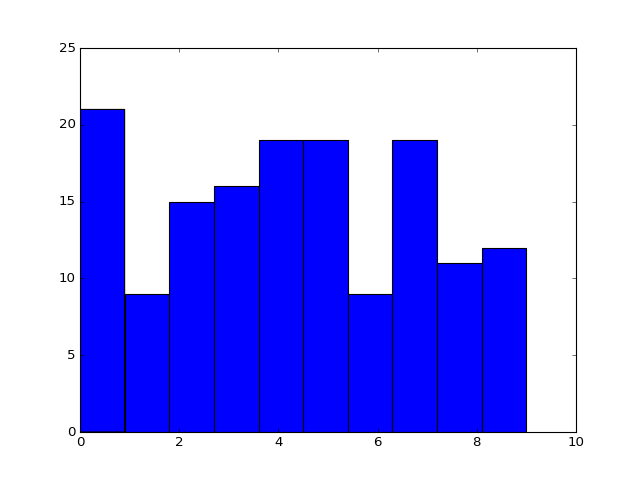

(array([ 21.,   9.,  15.,  16.,  19.,  19.,   9.,  19.,  11.,  12.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

In [8]:
# get terminal digits:
values = outside_colony_cnts[['c1','c2','c3']].values.flatten()
print len(values)
plt.hist(values%10)

In [27]:
import scipy.stats as stats

def chi_squared(samples, k):
    '''for uniform distributions at the moment'''
    n = float(len(samples))
    expected = n/k
    sum_term = 0
    for i in range(k):
        observed_i = np.count_nonzero(samples == i)
        sum_term += (observed_i - expected)**2
    return k/n * sum_term

values = outside_colony_cnts[['c1','c2','c3']].values.flatten()
chi_sq = chi_squared(values%10, 10)
p = stats.chisqprob(chi_sq, 9)
chi_sq, p

(12.133333333333333, 0.20589657510344794)

#### Alternative analysis: Permutation test